In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

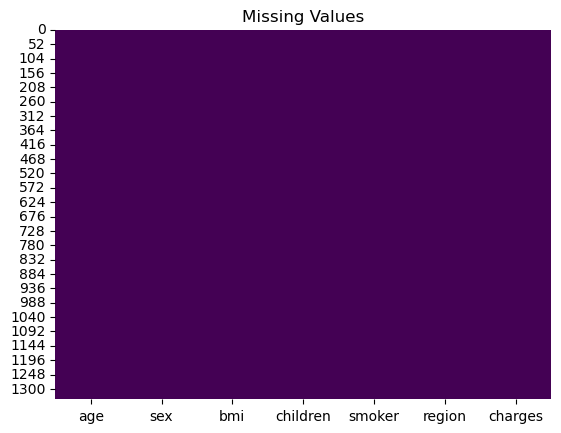

In [5]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

In [6]:
selected_features = ['age', 'sex', 'bmi', 'children', 'smoker', 'charges']
df = df[selected_features]
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [8]:
from sklearn.preprocessing import LabelEncoder

In [10]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [11]:
X = df['bmi'].values
y = df['charges'].values

In [12]:
# Define the linear regression function
def linear_regression(X, y, learning_rate, epochs):
    m = 0  # Slope/weight
    c = 0  # Intercept/bias
    n = float(len(X))  # Number of data points

    for i in range(epochs):
        # Predicted values
        y_pred = m * X + c

        # Gradient descent updates
        m_gradient = (-2/n) * sum(X * (y - y_pred))
        c_gradient = (-2/n) * sum(y - y_pred)
        m -= learning_rate * m_gradient
        c -= learning_rate * c_gradient

    return m, c

In [14]:
# Hyperparameters
learning_rate = 0.001
epochs = len(df)

In [15]:
m, c = linear_regression(X, y, learning_rate, epochs)

In [16]:
# Predictions using the trained model
y_pred = m * X + c

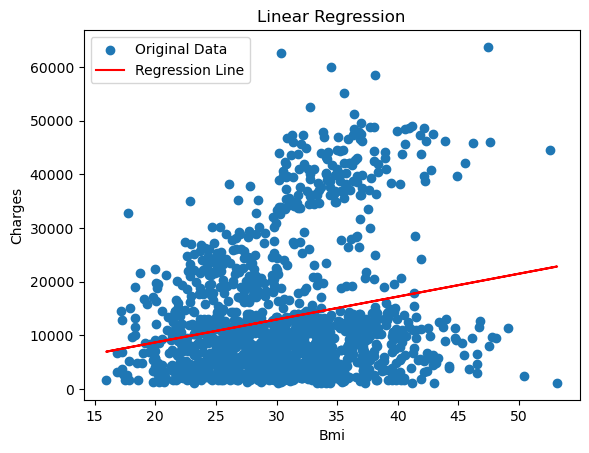

In [17]:
# Plot the original data and the regression line
plt.scatter(X, y, label='Original Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.legend()
plt.title('Linear Regression')
plt.show()

In [18]:
# Display the slope and intercept
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

Slope (m): 427.29931884188244
Intercept (c): 127.50671871007818
